most modern, efficient NLP solvers require derivatives of
the constraints and the objective function. 
Since the functions are nonlinear, this requires accurate numerical evaluation of these derivatives.
Additionally, in the case
of non-convex problems, multiple local minima may exist due to the shape of the
objective function or the constraints, and specifying a suitable starting point may be
critical. Pyomo is tested extensively with local and
global solvers that typically assume that these functions are continuous and smooth,
with continuous first (and possibly second) derivatives. 

IMPORTANT NOTE: when using pyomo for nonlinear programming, do not use non linear functions from other packages like numpy or math and use the internal pyomo capabilities.
for instance, instead of math.sin use pyo.sin

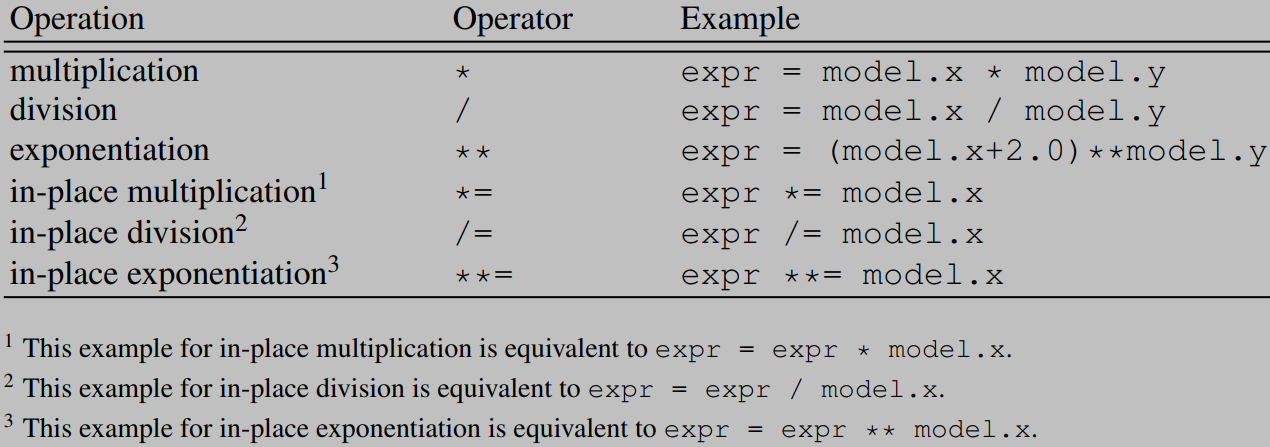

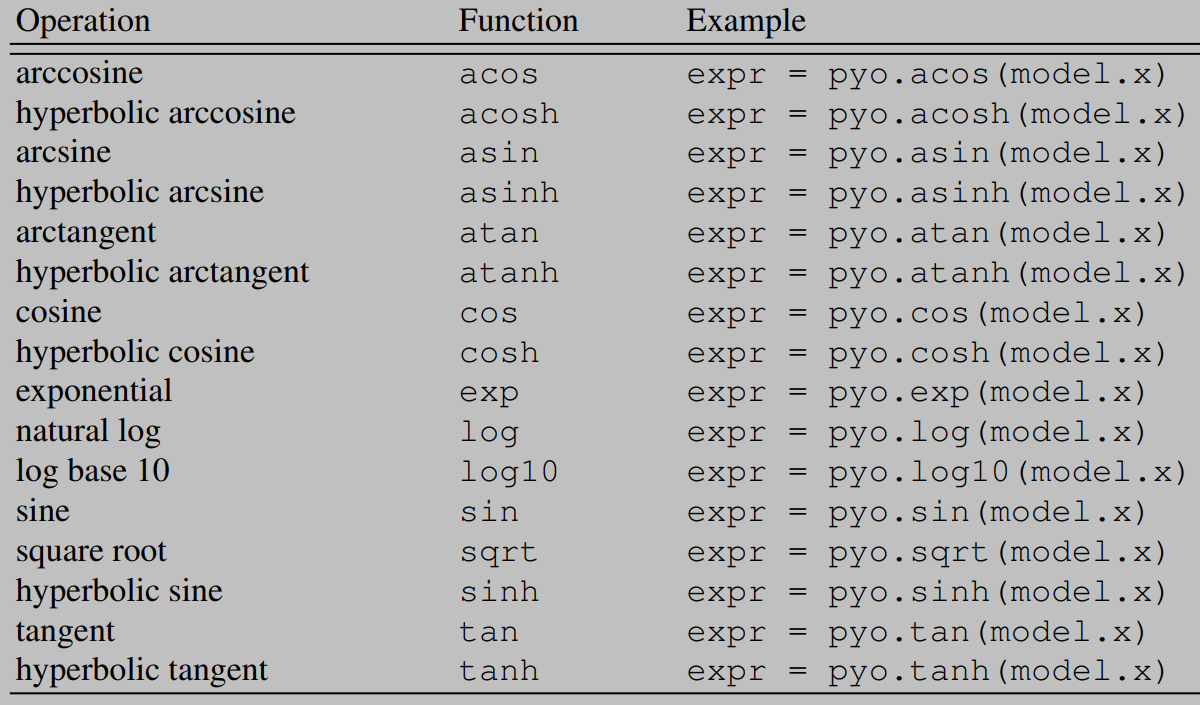

### sample: unconstrained two-variable function (Rosenbrock)

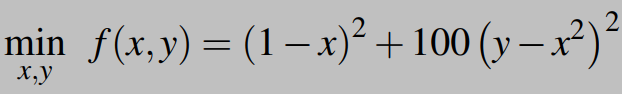

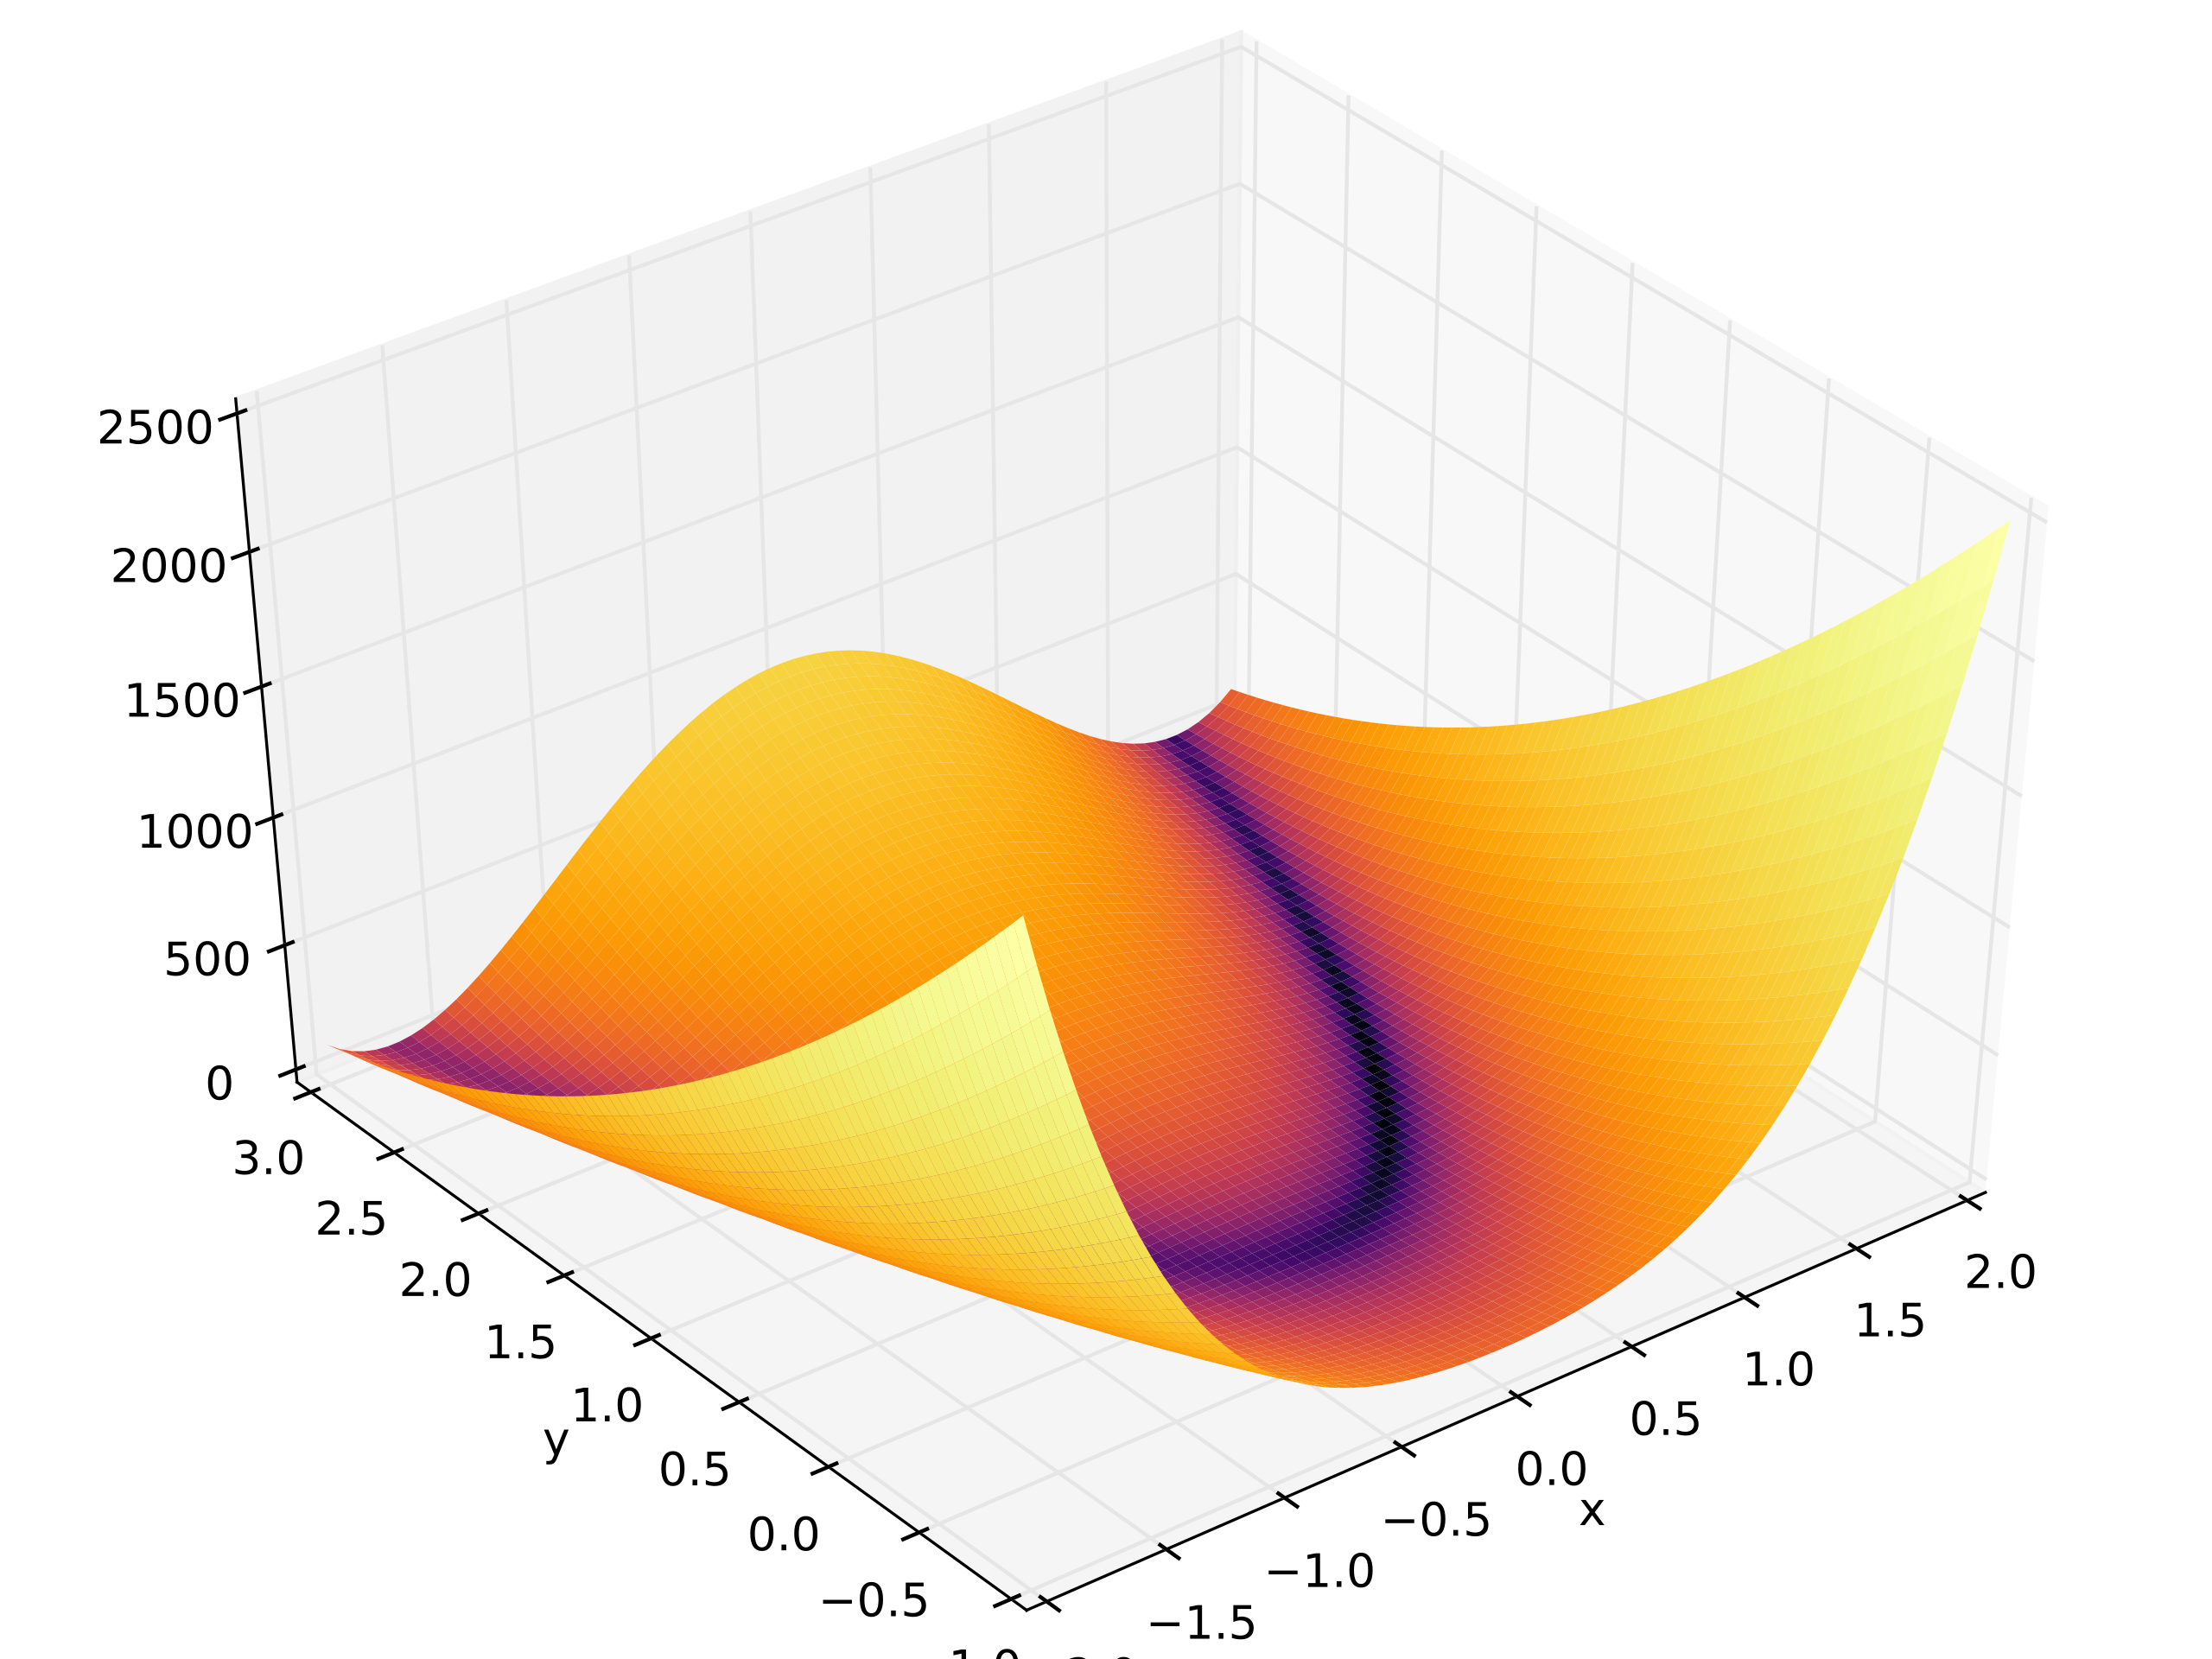

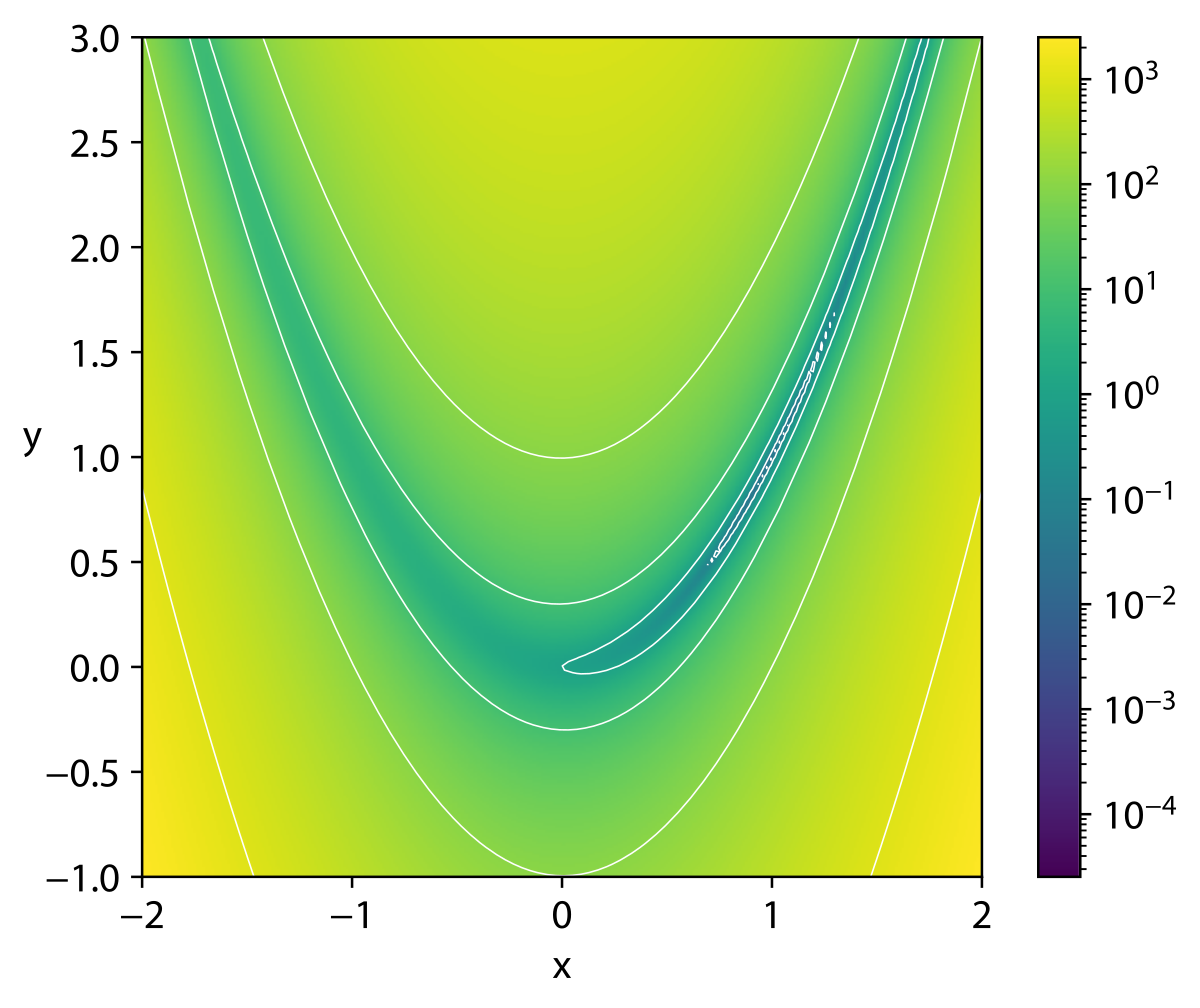

https://www.wolframalpha.com/input?i=minimize+%281-x%29%5E2+%2B+100*%28y-x%5E2%29%5E2

In [1]:
import pyomo.environ as pyo

In [5]:
model = pyo.ConcreteModel()

model.x = pyo.Var(initialize=1.5)
model.y = pyo.Var(initialize=1.5)

def rosenbrock(model):
    return (1.0 - model.x)**2 + 100.0*(model.y - model.x**2)**2
model.obj = pyo.Objective(rule=rosenbrock, sense=pyo.minimize)

status = pyo.SolverFactory("ipopt").solve(model)

pyo.assert_optimal_termination(status)
print(pyo.check_optimal_termination(status))

model.pprint()

True
2 Var Declarations
    x : Size=1, Index=None
        Key  : Lower : Value              : Upper : Fixed : Stale : Domain
        None :  None : 1.0000000000008233 :  None : False : False :  Reals
    y : Size=1, Index=None
        Key  : Lower : Value              : Upper : Fixed : Stale : Domain
        None :  None : 1.0000000000016314 :  None : False : False :  Reals

1 Objective Declarations
    obj : Size=1, Index=None, Active=True
        Key  : Active : Sense    : Expression
        None :   True : minimize : (1.0 - x)**2 + 100.0*(y - x**2)**2

3 Declarations: x y obj


# how to install IPOPT?

to install ipopt follow the steps:

1) go to anaconda navigator -> environments -> small green triangle -> open terminal -> type where anaconda

2) copy and paste the address (sth like this= D:\Users\ASUS\anaconda3)

3) go to the Library forlder

4) go to the bin folder.

5) download the ipopt from https://www.coin-or.org/download/binary/Ipopt/

6) extract it -> go to the bin folder -> copy ipopt

7) paste it in step 4 folder. DONE!

# variable initialization

Solvers for nonlinear programming problems often require the initialization of problem variables. If initial values are not specified, then Pyomo assumes that the initial
values are zero. However, these default values cannot be relied on in many applications.

# variable definition

Several nonlinear functions are only well defined over a **specific domain** (e.g., log(x)
is only valid for x > 0). Therefore, the modeler must take care to ensure the problem
formulation restricts the variable values to be within a valid domain. This is usually
accomplished by setting **reasonable bounds and initial values on the variables**.

It is also important to note that many nonlinear solvers use first (and sometimes
second) derivative information for the objective function and the constraints. Therefore, one may need to also **restrict the variables to be within a valid domain for the
derivatives of the nonlinear expressions**. For example, when sqrt(x) is included
in an expression, then specifying the bounds x ≥ 0 may not be sufficient. While √x
is valid at x=0, its derivative, 1=√x is not. **This should be considered when setting
reasonable variable bounds**.

Finally, note that some nonlinear interior-point solvers (e.g., IPOPT) may **relax
the variable bounds slightly before solving the problem**. While this has proven to
be an effective strategy in many applications, this can **sometimes cause a domain
violation** even if the modeler has specified reasonable variable bounds. One may
need to **disable this behavior in the solver** or **apply more conservative bounds**.

# example

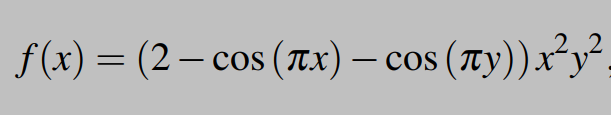

In [6]:
from math import pi

In [8]:
mdl = pyo.ConcreteModel()

# initial 0.25 - 2.1
mdl.x = pyo.Var(initialize = 0.25, bounds=(0,4))
mdl.y = pyo.Var(initialize = 0.25, bounds=(0,4))

def multimodal(mdl):
    return (2-pyo.cos(pi*mdl.x)-pyo.cos(pi*mdl.y)) * (mdl.x**2) * (mdl.y**2)

mdl.obj = pyo.Objective(rule=multimodal, sense=pyo.minimize)
status = pyo.SolverFactory("ipopt").solve(mdl)

pyo.assert_optimal_termination(status)
print(pyo.check_optimal_termination(status))

print(pyo.value(mdl.x), pyo.value(mdl.y))

True
2.0 2.0


# Booth’s Function

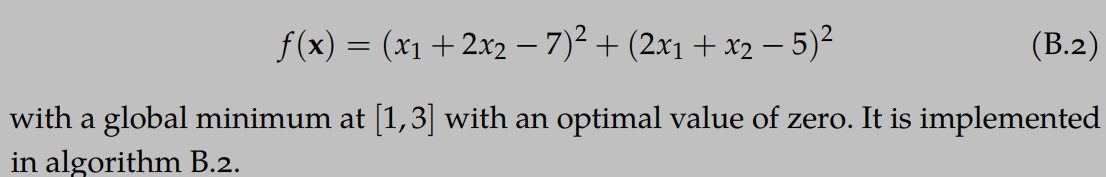

In [9]:
booth = pyo.ConcreteModel()

# initial 0.25 - 2.1
booth.x = pyo.Var(initialize = 0, bounds=(0,5))
booth.y = pyo.Var(initialize = 0, bounds=(0,5))

def OF(booth):
    return (booth.x + 2*booth.y - 7)**2 + (2*booth.x + booth.y - 5)**2
booth.obj = pyo.Objective(rule=OF, sense=pyo.minimize)

res = pyo.SolverFactory("ipopt").solve(booth)

pyo.assert_optimal_termination(res)
print(pyo.check_optimal_termination(res))

print(pyo.value(booth.x), pyo.value(booth.y))

True
1.0000000006151806 2.9999999994660644


# exercises

### exercise 1
Optimal Quotas for Sustainable Harvesting of Deer (7.4.2, p99)

### exercise 2
Estimation of Infectious Disease Models (7.4.3, p103)

### exercise 2
Reactor Design (7.4.4, p106)